# Lunita's Team:

* Cano Jeorval
* Cuevas Danilo
* Erosa Jorge
* Hernandez Andrés
* Robles Jack

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools

plt.rcParams["figure.figsize"] = (8,8)

# NB4. Information Cascades
## 1. Facebook Network

The ```socfb-Northwestern25``` (socfb-Northwestern25.edges.gz) is a snapshot of Northwestern University’s Facebook network. The nodes are anonymous users and the links are friend relationships. Load this network into a NetworkX graph in order to answer the following questions. Be sure to use the proper graph class for an undirected, unweighted network.
1. What proportion of nodes have degree 100 or greater?

In [2]:
G_fb = nx.read_edgelist('Networks/socfb-Northwestern25.edgelist')

In [3]:
#getting the degrees of each node
values = np.array([dgr[1] for dgr in G_fb.degree()])
sum(values >= 100)/len(values)

0.3821330557395666

### Answer:
The proportion of nodes that have degree 100 or greater is 38%

2. What is the maximum degree for nodes in this network?

In [4]:
np.max(values)

2105

### Answer:
The maximum node's degree is 2105 

3. Users in this network are anonymized by giving the nodes numerical names. Which node hast the highest degree?

In [5]:
max_idx = np.argmax(values)
fb_dict = dict(G_fb.degree)
key = list(fb_dict.keys())[max_idx]
print(key)

8262


### Answer:
It is the node '8262'

4. What is the 95th percentile for degree, i.e. the value such that 95% of nodes have this degree or less?

In [6]:
values_sort = np.sort(values)
np.percentile(values_sort, 95)

244.0

### Answer:
The 95th percentile for degree is 244

5. What is the mean degree for nodes in this network? Round to the nearest integer.

In [7]:
np.around(np.mean(values))

92.0

### Answer:
The mean degree is 92

6. Which of the following shapes best describes the degree distribution in this network? You can obtain the answer visually using histograms.

a. Uniform: node degrees are evenly distributed between the
minimum and maximum.

b. Normal: most node degrees are near the mean, dropping off rapidly in both directions.

c. Right-tailed: most node degrees are relatively small compared to the range of degrees.

d. Left-tailed: most node degrees are relatively large compared to the range of degrees.

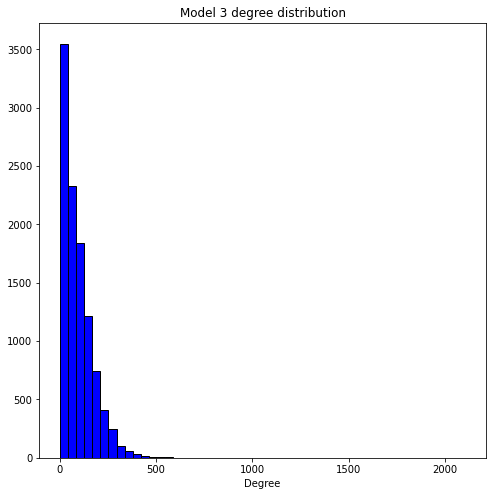

In [8]:
plt.hist(values, bins = 50, color = 'blue', edgecolor = 'black')
plt.xlabel('Degree')
plt.title('Model 3 degree distribution')
plt.show()

### Answer:
Right-tailed

Once you measure the number of nodes and links, use ```nx.gnm_random_graph()```to create a separate random network with the same number of nodes and links as the Facebook graph. Use this random network to answer the following questions.

7. What is the 95th percentile for degree in the random network, i.e. the value such that 95% of nodes have this degree or less?

In [9]:
n_links = G_fb.number_of_edges()
n_nodes = G_fb.number_of_nodes()
G_random = nx.gnm_random_graph(n = n_nodes, m = n_links, seed = 1)

In [10]:
random_values = np.array([dgr[1] for dgr in G_random.degree()])
print(np.percentile(random_values,95))

109.0


### Answer:
The 95th percentile is 109

8. Which of the following shapes best describes the degree distribution in this random network? You can obtain the answer visually using histograms.

a. Uniform: node degrees are evenly distributed between the
minimum and maximum.

b. Normal: most node degrees are near the mean, dropping off rapidly in both directions.

c. Right-tailed: most node degrees are relatively small compared to the range of degrees.

d. Left-tailed: most node degrees are relatively large compared to the range of degrees. 

In [11]:
np.mean(random_values)

92.42680041639065

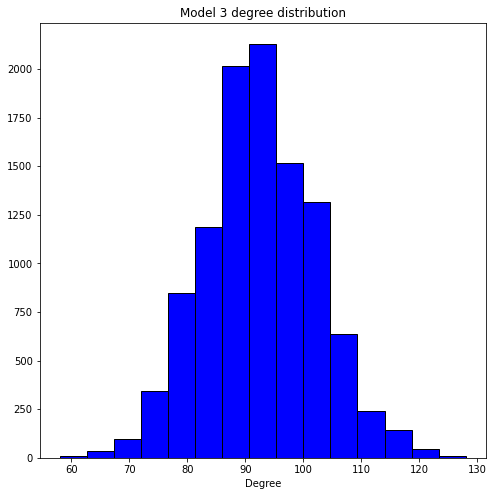

In [12]:
plt.hist(random_values, bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel('Degree')
plt.title('Model 3 degree distribution')
plt.show()

### Answer:
Normal

9. Estimate the average shortest-path length in this random network using a random sample of 1000 pairs of nodes.

In [13]:
giant_connected_component = max(nx.connected_components(G_random), key=len)
sample = np.random.choice(list(giant_connected_component), size =  1000, replace = False)

suma = 0

for initial, to_node in itertools.combinations(sample, 2):
    suma += nx.algorithms.shortest_paths.generic.shortest_path_length(G_random, initial, to_node)
            
average_length = 2 * suma/(1000 * (1000-1))

print(average_length)

2.435917917917918


### Answer:
The average shortest-path length is 2.4327

10. What is the average clustering coefficient of this random network? Answer to at least two decimal places.

In [14]:
Cc = nx.algorithms.cluster.average_clustering(G_random)
print(Cc)

0.00873055814855979


### Answer:
The average cluster coefficient is 0.0087

## 2. OpenFlights
Load the OpenFlights US flight (openflights_usa.edges.gz) network into a Network graph to answer the following questions.
1. What is the average number of routes served by each airport in this network?

In [15]:
G_airports = nx.read_edgelist('Networks/openflights_usa.edges')

In [16]:
air_values = np.array([dgr[1] for dgr in G_airports.degree()])

In [17]:
np.mean(air_values)

10.186813186813186

### Answer:
The average number of routes served by each airport is 10 routes

2. What are the top five airport in terms of number of routes?

In [18]:
air_dict = dict(G_airports.degree)

In [19]:
air_sort = np.flip(np.sort(air_values))
keys = np.flip(np.argsort(air_values))[:5]

### Answer:

In [20]:
air_list = list(air_dict.keys())

print("The five airports in terms of number of routes are: \n")
for i, value in zip(keys, air_sort[:5]):
    print("Airport: {} - - - - Number of routes: {}".format(air_list[i],value ))

The five airports in terms of number of routes are: 

Airport: ATL - - - - Number of routes: 153
Airport: ORD - - - - Number of routes: 149
Airport: DEN - - - - Number of routes: 148
Airport: DFW - - - - Number of routes: 138
Airport: MSP - - - - Number of routes: 117


3. How many airports in this network serve only a single route?

In [21]:
sum(air_values == 1)

156

### Answer: 
156 airports serve only one route

4. Which airport has the highest closeness centrality?

In [22]:
closeness = nx.algorithms.centrality.closeness_centrality(G_airports)

In [23]:
np.max(list(closeness.values()))

0.5038803683651619

In [24]:
idx = np.argmax(list(closeness.values()))
list(closeness.keys())[idx]

'DEN'

### Answer:
The airport with highest closeness centrality is DEN with 0.50388

5. Which airport has the highest betweeness centrality?

In [25]:
betweness = nx.algorithms.centrality.betweenness_centrality(G_airports, normalized = True)

In [26]:
np.max(list(betweness.values()))

0.3189906081983969

In [27]:
idx = np.argmax(list(betweness.values()))
list(betweness.keys())[idx]

'ANC'

### Answer:
The airport with highest betweness centrality is ANC with 0.3189

## 3. Zachary's Karate Club

1. Find the best bisection of Zachary’s karate club network by applying the Kernighan–Lin algorithm. You can use the ```kernighan_lin_bisection()``` function of NetworkX. Compare the resulting bipartition with the natural partition of the network and expose similarities and differences.

In [28]:
plt.rcParams["figure.figsize"] = (5,5)

In [29]:
G_club = nx.karate_club_graph()

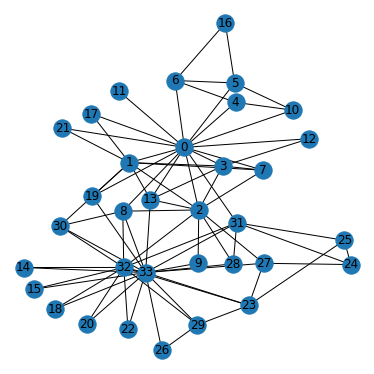

In [30]:
# Network Visualization
pos = nx.kamada_kawai_layout(G_club)
nx.draw(G_club, pos = pos, with_labels=True)

In [31]:
for node in G_club.nodes(data = True):
    print(node)

(0, {'club': 'Mr. Hi'})
(1, {'club': 'Mr. Hi'})
(2, {'club': 'Mr. Hi'})
(3, {'club': 'Mr. Hi'})
(4, {'club': 'Mr. Hi'})
(5, {'club': 'Mr. Hi'})
(6, {'club': 'Mr. Hi'})
(7, {'club': 'Mr. Hi'})
(8, {'club': 'Mr. Hi'})
(9, {'club': 'Officer'})
(10, {'club': 'Mr. Hi'})
(11, {'club': 'Mr. Hi'})
(12, {'club': 'Mr. Hi'})
(13, {'club': 'Mr. Hi'})
(14, {'club': 'Officer'})
(15, {'club': 'Officer'})
(16, {'club': 'Mr. Hi'})
(17, {'club': 'Mr. Hi'})
(18, {'club': 'Officer'})
(19, {'club': 'Mr. Hi'})
(20, {'club': 'Officer'})
(21, {'club': 'Mr. Hi'})
(22, {'club': 'Officer'})
(23, {'club': 'Officer'})
(24, {'club': 'Officer'})
(25, {'club': 'Officer'})
(26, {'club': 'Officer'})
(27, {'club': 'Officer'})
(28, {'club': 'Officer'})
(29, {'club': 'Officer'})
(30, {'club': 'Officer'})
(31, {'club': 'Officer'})
(32, {'club': 'Officer'})
(33, {'club': 'Officer'})


In [44]:
ker_partition = nx.algorithms.community.kernighan_lin.kernighan_lin_bisection(G_club)

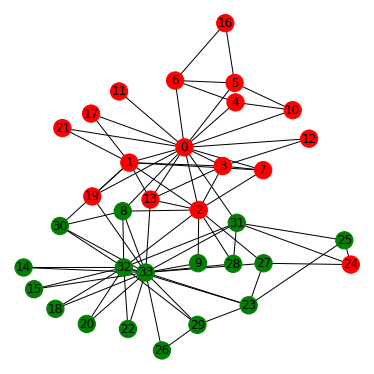

In [45]:
node_colors = ['red' if node in list(ker_partition[0]) else 'green' for node in G_club.nodes]
nx.draw(G_club, node_color=node_colors, pos = pos, with_labels=True)

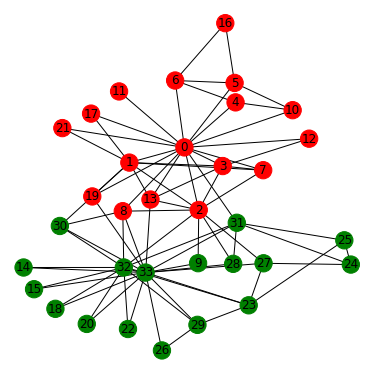

In [42]:
mapping = {'Mr. Hi': 'red',
             'Officer': 'green'}

node_colors = [mapping[G_club.nodes[node]['club']] for node in G_club.nodes]

nx.draw(G_club, node_color=node_colors, pos = pos, with_labels=True)

### Answer:
The Kernighan-Lin algorithm tries to find a partition. As far as we can tell, the partition it finds might or might not be connected... there's no guarantee that it will output a connected partition, nor that it will find the optimal solution. Also all pairs are swapped exactly once during a single pass... this means it happens even if the "gain" by which it's supposed to be guided by, is negative. So we're basically accepting "worse" moves while finding a better minima.

We can see how it's pretty similar, yet there are some nodes such as 8 and 24 which are different. This gives us a clear look into what the K-L algorithm takes as "acceptable errors" to find the best value for the amount of passes it does. It changes based on repetition, there is an element of randomness in there. And this was the best result we got. We started off with a 14/24 "difference" now only 2/34. 

2. Apply the Girvan–Newman algorithm using the ```community.girvan_newman()``` function of NetworkX. Verify that the partition $P_{GN}$ in five clusters is the one with highest modularity.

In [35]:
girvan_partition = nx.algorithms.community.centrality.girvan_newman(G_club)

In [36]:
result = np.NINF
length = 0

for partition in girvan_partition:
    temp_length = len(partition)
    temp = nx.algorithms.community.quality.modularity(G_club, partition)
    
    if temp >  result:
        result = temp
        length = temp_length

In [37]:
length

5

In [38]:
result

0.40129848783694944

### Answer:
As you can see using brute force we could verify tat five clusters is the one with highest modularity with a modularity of 0.4013

3. The modularity maximization algorithm, proposed by Newman, iteratively joins pairs of communities if the move increases the partition's modularity. Read about the Greedy Modularity Algorithm to find communities ([link](http://networksciencebook.com/chapter/9#modularity)).

Write the general outline in the following space.

To start to talk about the greedy modularity algorithm first is necessary to have an understanding of what the modularity expects after iterating among pairs of values, which is to get the highest overall when summing the all the nodes communities, the order how the modularity works is that whenever we have high modularity, we will reach the optimal partitioning, the communities will be detected successfully, to understand bad modularity overall, when we have 0 modularity, the identified community would be the whole graph, while if there are a negative M the communities detected will be one for each node, so that is why it is important to get the best M possible to have an accurate community detection.

Nevertheless, to have to compute all pairs among the nodes is expensive, and this is where the greedy modularity algorithm shines, the idea that was proposed is to have the pairs of the different communities, if there is an increase in the pair of communities the algorithm would make a community connected to the other community and compute the difference of modularity, with this if there is an increase in the modularity, it merges the pairs, otherwise, continues iterating through all the graph, and selects the higher M so that we could have the optimal maximization of M.

The greedy algorithm has a complexity of O(L), nevertheless, the worst case would be O(n), because the decision of which community should be merged could iterate through all the nodes.

4. Apply the NetworkX function for greedy modularity optimization ```community.greedy_modularity_communities()```. 
How many communities are there in the resulting partition $P_G$? Which partition has higher modularity, $P_{NG}$  or $P_G$? 

In [39]:
greedy = nx.algorithms.community.modularity_max.greedy_modularity_communities(G_club)

In [40]:
communities = len(greedy)
print("There exist: {} communties".format(communities))

There exist: 3 communties


In [41]:
greedy_mod = nx.algorithms.community.quality.modularity(G_club, greedy)
print("greedy modularity: ", greedy_mod)

greedy modularity:  0.3806706114398422


### Answer:
There are 3 communities en the Partition using the greedy method, and as you can notice in the already shown modularities the one with is the highest betwenn $P_{NG}$  and $P_G$; is $P_{NG}$ 